# Carcinoma do endométrio do corpo uterino
Autores: Duarte Velho(pg53841), Joana Lopes(pg53498), Ricardo Oliveira(pg53501)

Este trabalho foi desenvolvido no âmbito da UC Extração de Conhecimentos de Dados Biológicos (2023/24), do Mestrado em Bioinformática da Escola de Engenharia da Universidade do Minho, e tem como objetivo a análise de um conjunto de dados de expressão genética relacionados com o Carcinoma Endometrial do Corpo Uterino utilizando python e os seus diversos packages.

## 1ª parte
A primeira fase deste trabalho será constituída pelas seguintes etapas: - explicação dos dados, sua origem e relevância; - tarefas de preparação e de pré-processamento dos dados; - sumarização dos dados (estatística descritiva, exploração com recurso a gráficos); - análise estatística univariada e análise de expressão diferencial e de enriquecimento.

### Instalação e importação de packages

Nesta secção são destacados todos os packages utilizados no trabalho, que facilitam a aquisição e análise de dados ao longo do documento, tornando mais eficiente a obtenção e compreensão das informações relevantes.



In [1]:
import pandas as pd
import re
import matplotlib as plt

### Introdução

#### Enquadramento

Nos dias de hoje, o cancro é uma das principais causas de morte a nível mundial, sendo que, segundo a Organização Mundial da Saúde (OMS), em 2020, foram diagnosticados cerca de 19,3 milhões de novos casos de cancro, que resultaram na morte, de aproximadamente 10 milhões de pessoas [1].
O preocupante aumento da incidência do cancro ao longo das últimas décadas, levou ao surgimento de iniciativas, tal como a PanCancer Atlas, que visam encontrar respostas para as grandes e abrangentes questões sobre o cancro, através da análise de tumores caracterizados no conjunto de dados resultantes do projeto de The Cancer Genome Atlas (TCGA).
O TCGA é um programa de genómica de referência na área do cancro que, em colaboração com o Instituto Nacional do Cancro (NCI) e o Instituto Nacional de Pesquisa do Genoma Humano (NHGRI) dos Estados Unidos, caracterizou mais de 20 mil cancros primários abrangendo 33 tipos de cancro.
Os tipos de cancro selecionados para estudo cumprem requisitos tais como ter um mau prognóstico, ter um impacto geral na saúde pública, disponibilidade de amostras com a qualidade e quantidade desejadas, entre outros.
(National Cancer Institute, 2022)

O cancro endometrial do corpo uterino, um dos cancros incluídos no TCGA, é o sétimo tumor maligno mais frequente no mundo e o quarto mais comum na mulher sendo a doença ginecológica maligna dominante, tendo provocado em 2011 mais de 8 mil mortes [2,3].
De todos os cancros do corpo uterino mais de 83% correspondem a carcinomas do endométrio, enquanto apenas 10% dos diagnósticos são classificados como sarcomas [2].
Este tipo de cancro tem ganho maior atenção por parte da comunidade científica, uma vez que se verificou um aumento da sua incidência com a agravante de que a taxa de sobrevivência aos 5 anos é consideravelmente menor, em comparação com o ano de 1975, passando de 88% para cerca de 84%, em 2006, indicando um aumento na mortalidade [3].
A taxa de sobrevivência está fortemente correlacionada com o estádio da doença aquando do diagnóstico, sendo que para pacientes no estádio inicial se considera curável atingindo cerca de 96% de sobrevivência.
No entanto, para fases mais avançadas e de alto grau, é considerado letal reduzindo drasticamente a taxa de sobrevivência para 17%.

#### Objetivo

Com base na problemática apresentada, este trabalho tem como objetivo analisar o perfil transcriptómico de células endometeriais do corpo uterino de pacientes diagnosticados com cancro para determinadas condições descritas nos metadados, de modo a realizar a análise da expressão diferencial com o intuito de compreender qual o efeito do fator no perfil transcriptómico das células e como esse perfil se traduz na gravidade da doença observada.
Os dados utilizados neste trabalho estão disponíveis no [GDC DataPortal](https://shorturl.at/fmpJ5).


### Extração dos dados de transcriptómica e respetivos metadados da base de dados

#### Obtenção dos dados

Com o objetivo de analisar os dados de transcriptómica referente ao carcinoma endometrial do corpo uterino, procedemos à extração da informação que se encontra presente no website cBioPortal, onde se encontram disponibilizados, de forma gratuita, uma grande diversidade de alterações genómicas de vários tipos de cancro, incluindo o cancro selecionado para estudo.
Como no trabalho anterior já procedemos ao download dos dados de expressão genética e dos seus respetivos metadados, apenas se realizou a leitura dos respetivos dados utilizando o package pandas

In [2]:
# atenção demora a correr (no meu pc demorou 6min a ler os ficheiros)
gene_exp = pd.read_excel(io="../Data/expressao_genetica.xlsx", index_col=0)
genes_meta = pd.read_excel(io="../Data/genes_metadados.xlsx", index_col=0)
amostras_meta = pd.read_excel(io="../Data/amostras_metadados.xlsx", index_col=0)

In [3]:
print(f"Classe dos dados de expressão:{type(gene_exp)}")
print(f"Classe dos dados de expressão:{type(genes_meta)}")
print(f"Classe dos dados de expressão:{type(amostras_meta)}")
print(f"\nO dataframe da expressão genética tem {gene_exp.shape[0]} linhas e {gene_exp.shape[1]} colunas")
print(f"O dataframe dos genes possui {genes_meta.shape[0]} linhas e {genes_meta.shape[1]} colunas")
print(f"O dataframe das amostras tem {amostras_meta.shape[0]} linhas e {amostras_meta.shape[1]} colunas")
print(f"\nNomes das 5 primeiras colunas do dataframe de expressão genética: {gene_exp.columns.values[0:5]}")
print(f"Nomes das 5 primeiras colunas do dataframe dos genes: {genes_meta.columns.values[0:5]}")
print(f"Nomes das 5 primeiras colunas do dataframe das amostras: {amostras_meta.columns.values[0:5]}")

Classe dos dados de expressão:<class 'pandas.core.frame.DataFrame'>
Classe dos dados de expressão:<class 'pandas.core.frame.DataFrame'>
Classe dos dados de expressão:<class 'pandas.core.frame.DataFrame'>

O dataframe da expressão genética tem 60660 linhas e 589 colunas
O dataframe dos genes possui 60660 linhas e 10 colunas
O dataframe das amostras tem 589 linhas e 78 colunas

Nomes das 5 primeiras colunas do dataframe de expressão genética: ['TCGA-FI-A3PX-01A-11R-A22K-07' 'TCGA-BG-A221-01A-21R-A157-07'
 'TCGA-EY-A1GK-01A-11R-A13S-07' 'TCGA-BG-A2AE-01A-11R-A16F-07'
 'TCGA-AX-A1CE-01A-11R-A137-07']
Nomes das 5 primeiras colunas do dataframe dos genes: ['source' 'type' 'score' 'phase' 'gene_id']
Nomes das 5 primeiras colunas do dataframe das amostras: ['barcode' 'patient' 'sample' 'shortLetterCode' 'definition']


Através da análise exploratória inicial dos dados verificou-se que os dados de expressão genénitca, os dados dos genes e das amostras estão no formato de dataframe. O dataframe da expressão genética é constituído por 60660 linhas que correspondem ao genes para o qual se estudou a sua expressão genética e 589 colunas que representam as amostras análisadas no estudo. Para cada gene existem 10 colunas de metadados associados que acrescentam informação adicional sobre os genes, incluindo o gene_id (código Ensembl), tal como a sua fonte, o nome do gene, entre outros atributos, que podem ser acessados e explorados.
Em relação às amostras, existem 78 colunas de metadados que possibilitam a caracterização das 589 amostras utilizadas neste estudo possibilitando a análise do impacto que as diversas características possuem no estádio ou na gravidade da doença com base nos dados da expressão genética de cada amostra.

Por diversas razões várias vezes os metadados associadas às amostras possuem elevada quantidade de valores omissos, o que pode levar a uma redução considerável das amsotras utilizadas em estudo caso a variável que se pretende análisar seja uma das que apresenta elevada percentagem de valores omissos. Para evitar tal acontecimento, primeiramente procedeu-se a uma filtragem do datafram "amostras_meta" com o inuito de apenas preservar as variavíes que possuem menos de 10% de valores omissos

In [4]:
# filtrar as colunas que são objetos
data_types = amostras_meta.dtypes
string_cols = data_types[data_types == 'object'].index
amostras_meta_filtered = amostras_meta[string_cols]


# Identificar colunas com mais de 60 contagens de "not reported" 
rm_not_reported = amostras_meta_filtered.apply(lambda x: x.str.lower().str.count("not reported").sum() > 60)
rm_not_reported = rm_not_reported.index[rm_not_reported].tolist()


# Identificar colunas com mais de 60 contagens de "unkown" 
rm_unkown = amostras_meta_filtered.apply(lambda x: x.str.lower().str.count("unknown").sum() > 60)
rm_unkown = rm_unkown.index[rm_unkown].tolist()


# Identificar colunas com mais de 60 valores NA
rm_nas = amostras_meta.isna().sum() > 60
rm_nas = rm_nas.index[rm_nas].tolist()


# Remover colunas identificadas
amostras_meta_reduzido = amostras_meta.drop(columns=rm_not_reported + rm_unkown + rm_nas)


# Obter dimensões do DataFrame reduzido
dimensao = amostras_meta_reduzido.shape
print(f"Dimensões do DataFrame filtrado: {dimensao}")
print(f"\nNomes das colunas do dataframe das amostras filtrado: {amostras_meta.columns.values}")


Dimensões do DataFrame filtrado: (589, 46)

Nomes das colunas do dataframe das amostras filtrado: ['barcode' 'patient' 'sample' 'shortLetterCode' 'definition'
 'sample_submitter_id' 'sample_type_id' 'tumor_descriptor' 'sample_id'
 'sample_type' 'composition' 'days_to_collection' 'state' 'initial_weight'
 'preservation_method' 'pathology_report_uuid' 'submitter_id'
 'oct_embedded' 'specimen_type' 'is_ffpe' 'tissue_type' 'figo_stage'
 'synchronous_malignancy' 'days_to_diagnosis' 'treatments'
 'last_known_disease_status' 'tissue_or_organ_of_origin'
 'days_to_last_follow_up' 'age_at_diagnosis' 'primary_diagnosis'
 'prior_malignancy' 'year_of_diagnosis' 'prior_treatment' 'morphology'
 'classification_of_tumor' 'diagnosis_id' 'icd_10_code'
 'site_of_resection_or_biopsy' 'tumor_grade' 'progression_or_recurrence'
 'alcohol_history' 'exposure_id' 'race' 'gender' 'ethnicity'
 'vital_status' 'age_at_index' 'days_to_birth' 'year_of_birth'
 'demographic_id' 'year_of_death' 'days_to_death' 'bcr_pati

Com esta filtragem o número de colunas passou de 78 para 46 garantindo assim que as características que possam ser utilizadas para as análises posteriores abrangem a maioria das amostras garantindo maior confiabilidade na análise realizada.

### Análise Descritiva e Exploratória
Para o nosso estudo, de entre as colunas de metadados reduzida, selecionou-se 4 variáveis de caraterísticas distintas, nomeadamente as colunas "vital_status", "primary_diagnosis", "age_at_index" e "figo_stage" para se proceder a uma análise descritiva e exploratória das amostras.

In [5]:
meta_amostras = amostras_meta_reduzido[["vital_status", "primary_diagnosis", "age_at_index","figo_stage"]]

# substituir os valores de figo state apenas pelas iniciais
meta_amostras['figo_stage'] = meta_amostras['figo_stage'].replace(r'.*\b(Stage [VI]+).*', r'\1', regex=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_21464\342081174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_amostras['figo_stage'] = meta_amostras['figo_stage'].replace(r'.*\b(Stage [VI]+).*', r'\1', regex=True)


In [6]:
meta_amostras["figo_stage"]

row.names(amostras_metadados)
TCGA-FI-A3PX-01A-11R-A22K-07    Stage III
TCGA-BG-A221-01A-21R-A157-07      Stage I
TCGA-EY-A1GK-01A-11R-A13S-07      Stage I
TCGA-BG-A2AE-01A-11R-A16F-07      Stage I
TCGA-AX-A1CE-01A-11R-A137-07      Stage I
                                  ...    
TCGA-AJ-A3NF-01A-11R-A22K-07    Stage III
TCGA-BK-A0C9-01A-11R-A00V-07      Stage I
TCGA-AJ-A5DW-01A-11R-A27V-07      Stage I
TCGA-AP-A05J-01A-11R-A00V-07     Stage II
TCGA-D1-A103-01A-11R-A10J-07      Stage I
Name: figo_stage, Length: 589, dtype: object

### Análise de expressão diferencial 

In [7]:
# Filtrar amostras onde primary_diagnosis não é NaN
amostras_filtradas = meta_amostras.dropna(subset=['primary_diagnosis'])

# Filtrar amostras com primary_diagnosis igual a "Endometrioid adenocarcinoma, NOS"
amostras_filtradas = amostras_filtradas[amostras_filtradas['primary_diagnosis'] == "Endometrioid adenocarcinoma, NOS"]

# Selecionar dados de expressão gênica correspondentes às amostras filtradas
dados_EA = gene_exp.loc[:, amostras_filtradas.index]

# Dimensão dos dados_EA
dimensao_dados_EA = dados_EA.shape

print(dimensao_dados_EA)

(60660, 423)


In [8]:
# Contar o número de valores NaN na coluna 'vital_status' de amostras_filtradas
num_na_vital_status = amostras_filtradas['figo_stage'].isna().sum()

print(num_na_vital_status)

0


In [9]:
#pip install scanpy scipy

In [10]:
import scanpy as sc

In [11]:
#transposta de dados_EA para atribuição ao objeto adata
adata = sc.AnnData(dados_EA.T)

In [12]:
# Filtrar células e genes de baixa qualidade
sc.pp.filter_cells(adata, min_genes=20)
sc.pp.filter_genes(adata, min_cells=4)

# Normalizar os dados
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [13]:
adata.obs['condition'] = amostras_filtradas['figo_stage'].values

In [15]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]

In [18]:
sc.pp.scale(adata, max_value=10)

In [19]:
import numpy as np

In [20]:
# Substituir valores negativos por zero (ou outro valor positivo pequeno), isto porque ao fazer scale dos dados podemos obter valores negativos
adata.X = np.where(adata.X < 0, 0.1, adata.X)

In [21]:
# Definir a condição a ser analisada
adata.obs['condition'] = adata.obs['condition'].astype('category')

# Realizar a análise de expressão diferencial
sc.tl.rank_genes_groups(adata, groupby='condition', method='wilcoxon', groups=['Stage IV'], reference='Stage I')

# Obter os resultados
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names

# Converter os resultados para DataFrame
de_genes = pd.DataFrame({group: result['names'][group] for group in groups})
de_pvals = pd.DataFrame({group: result['pvals'][group] for group in groups})
de_logfoldchanges = pd.DataFrame({group: result['logfoldchanges'][group] for group in groups})

# Supondo que você está interessado na comparação 'alive' vs 'dead'
group_of_interest = 'Stage IV'

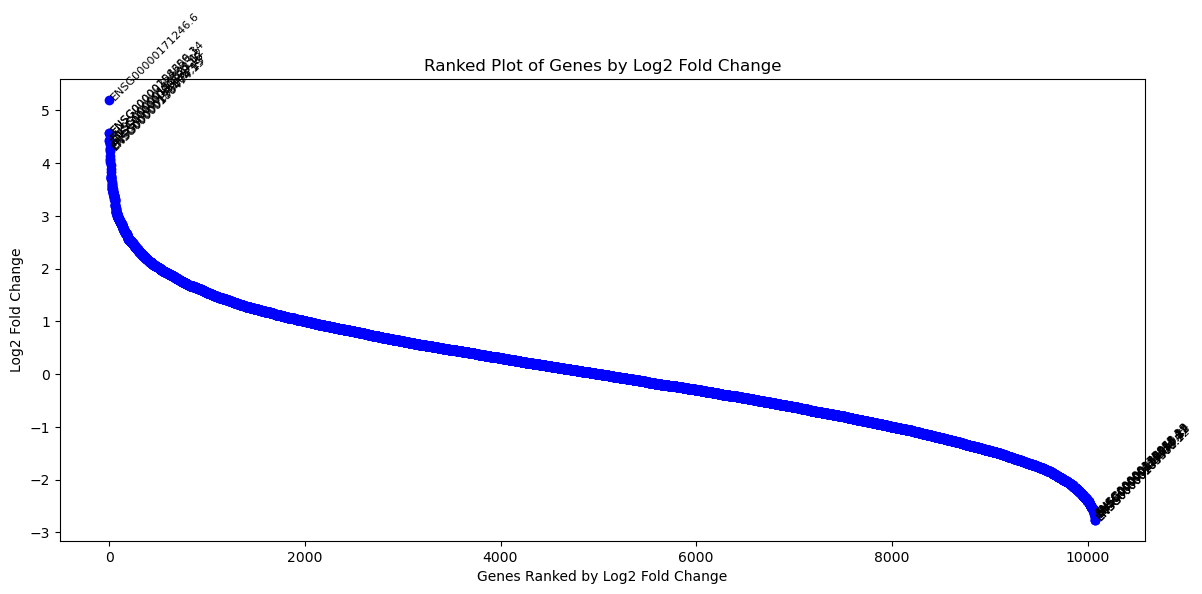

In [22]:
import matplotlib.pyplot as plt

# Converter os resultados para DataFrame
de_genes = pd.DataFrame(result['names'])
de_logfoldchanges = pd.DataFrame(result['logfoldchanges'])
de_pvals = pd.DataFrame(result['pvals_adj'])  # Usar p-values ajustados se disponíveis

# Selecionar o grupo de interesse
group_of_interest = 'Stage IV'

# Preparar os dados para o plot
log2FoldChange = de_logfoldchanges[group_of_interest].values
gene_names = de_genes[group_of_interest].values

# Criar o DataFrame consolidado
resultados = pd.DataFrame({
    'log2FoldChange': log2FoldChange,
    'gene_name': gene_names
})

# Ordenar os resultados pela alteração na expressão em ordem decrescente
resultados_ord = resultados.sort_values(by='log2FoldChange', ascending=False)

# Preparar os dados para o plot
ranked_genes = resultados_ord['log2FoldChange'].values
gene_names = resultados_ord['gene_name'].values

# Plotar
plt.figure(figsize=(14, 6))
plt.plot(ranked_genes, 'bo')
plt.xlabel('Genes Ranked by Log2 Fold Change')
plt.ylabel('Log2 Fold Change')
plt.title('Ranked Plot of Genes by Log2 Fold Change')

# Marcar os genes mais expressos e menos expressos
for i, gene in enumerate(gene_names[:10]):
    plt.text(i, ranked_genes[i], gene, fontsize=8, rotation=45)
for i, gene in enumerate(gene_names[-10:]):
    plt.text(len(ranked_genes) - 10 + i, ranked_genes[-10 + i], gene, fontsize=8, rotation=45)

plt.show()

In [36]:
resultados_ord['gene_name'] #imprimir os nomes dos genes ordenados de acordo com o log fold change em ordem decrescente"

106       ENSG00000171246.6
1325      ENSG00000254656.3
669      ENSG00000108309.14
34       ENSG00000132821.12
65        ENSG00000140323.6
                ...        
10018    ENSG00000125434.11
9983      ENSG00000114638.8
10026     ENSG00000163501.7
10080    ENSG00000164488.12
10043     ENSG00000260676.5
Name: gene_name, Length: 10081, dtype: object

Através da análise dos gráficos, podemos ver que o gene **ENSG00000171246.6** é o que se encontra mais expresso para a condição de estadio IV do tumor (tendo como comparativo o estadio I). Este gene pode ser acedido no NCBI gene através do seu identificador, onde é descrito como codificador de uma proteína, **NPTX1** (neuronal pentraxin 1). Após uma breve pesquisa na literatura existente, estudos apontam para a envolvência de NPTX1 em processos de indução de apoptose em diferentes tipos celulares. Um estudo conduzido em 2014, cujo objetivo foi entender como os contraceptivos progestativos afetam as células do endométrio, revelou que em mulheres que receberam contracetivos progestativos de longa duração se observou um aumento na expressão de NPTX1 no endométrio e que, o aumento da expressão de NPTX1 estava associado à indução de apoptose (morte celular programada) em células endoteliais do endométrio(Guzeloglu-Kayisli et al., 2014). Ou seja, os achados relacionados à expressão aumentada de NPTX1 e sua indução de apoptose nas células endoteliais podem fornecer insights importantes sobre os processos biológicos subjacentes a distúrbios uterinos. Relacionando com o nosso dataset, estes achados podem de facto fazer sentido, uma vez que o aumento da apoptose das células endoteliais e a instabilidade vascular podem facilitar a invasão tumoral e a disseminação metastática do câncer de endométrio. 

Por outro lado, através do comando **resultados_ord['gene_name']** vemos que o gene que se encontra menos expresso para a condição de estadio IV do tumor (tendo como comparativo o estadio I) é o gene **ENSG00000260676.5**. Também conhecido como "Uterine Endometrial Carcinoma-Associated Transcript", este gene, **LINC01541**, é uma sequência de RNA longo que não codifica proteínas e está localizado em um região intergênica do genoma. Um estudo cujo objetivo foi investigar o papel do gene LINC01541 na endometriose, revelou que o silenciamento de LINC01541 (redução da expressão) aumentou significativamente as capacidades migratórias e invasivas das células para tecidos circundantes, ou seja, as células tornaram-se mais propensas a se moverem e invadirem outros tecidos (Mai et al., 2019). Desta forma, no contexto do nosso dataset, os resultados obtidos na expressão diferencial parecem fazer sentido, isto é, uma vez que estamos a observar a expressão génica para a condição de estadio IV do tumor, que representa a forma mais agressiva do tumor onde há extensão do tumor para estruturas adjacentes, seria de esperar que este gene se encontra-se subexpresso e é, efetivamente, o que verficamos. 


### Redução da dimensionalidade
As técnicas Principal Component Analysis (PCA) e t-Distributed Stochastic Neighbor Embedding (t-SNE) são duas técnicas de redução de dimensionalidade amplamente utilizadas na análise de dados. Ambas têm como objetivo reduzir a complexidade dos dados, eliminando a redundância (muito caraterísitca em datasets desta natureza) permitindo a visualização e a compreensão de padrões ou estruturas subjacentes. Muitas vezes, é útil usar ambos em conjunto: PCA para uma visão geral dos dados e t-SNE para uma visualização mais detalhada e interpretação de padrões locais.

#### PCA

In [26]:
dados_EA_transpostos = dados_EA.transpose()

In [27]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [29]:
array_data = preprocessing.scale(dados_EA_transpostos)
data_scale =  pd.DataFrame(array_data, index =dados_EA_transpostos.index , columns = dados_EA_transpostos.columns)

In [64]:
pca_cach = PCA(n_components=2)
pca_cach.fit(data_scale)
X_r = pca_cach.transform(data_scale) # transformacao dos dados no novo espaço utilizando apenas 5 CP
print('Var. explicada: %s'% str(pca_cach.explained_variance_ratio_))
print('Soma:', sum(pca_cach.explained_variance_ratio_) * 100, "%")

Var. explicada: [0.14719413 0.10970642]
Soma: 25.690054366370823 %


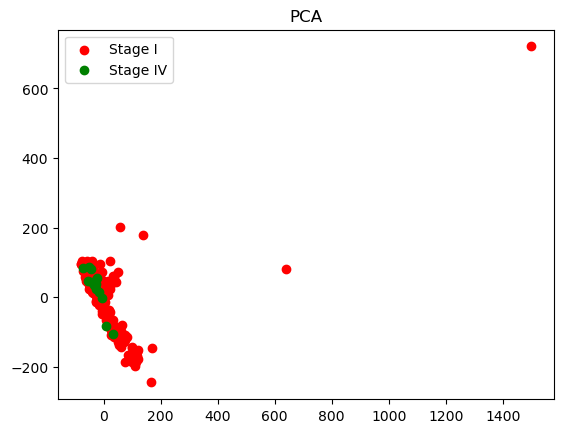

In [65]:
meta_values = amostras_filtradas["figo_stage"]
plt.figure()
for c, name in zip("rg", ["Stage I", "Stage IV"]):
    plt.scatter(X_r[meta_values == name, 0], X_r[meta_values == name, 1], c=c, label=name)
plt.legend()
plt.title('PCA')
plt.show()

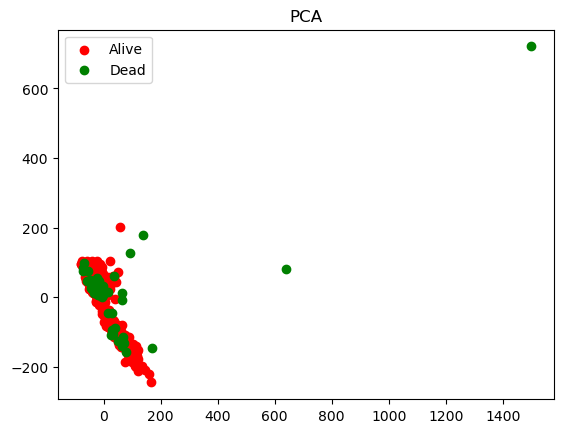

In [56]:
meta_values2 = amostras_filtradas["vital_status"]
plt.figure()
for c, name in zip("rg", ["Alive", "Dead"]):
    plt.scatter(X_r[meta_values2 == name, 0], X_r[meta_values2 == name, 1], c=c, label=name)
plt.legend()
plt.title('PCA')
plt.show()

Como podemos ver através do primeiro e segundo gráficos, os dados são mostrados em função do "figo_stage" e em função do "vital_status" respetivamente, e, vemos que estes não conseguem ser explicados por nenhuma das condições de metadados, uma vez que não há uma divisão clara entre os grupos. No entanto, devemos ressalvar que os os PC1 e PC2 apenas explicam 25.69% da variabilidade dos nossos dados, logo, não é possível retirar uma conclusão segura destes gráficos.

#### t-SNE

In [47]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=1000)
points = tsne.fit_transform(data_scale)

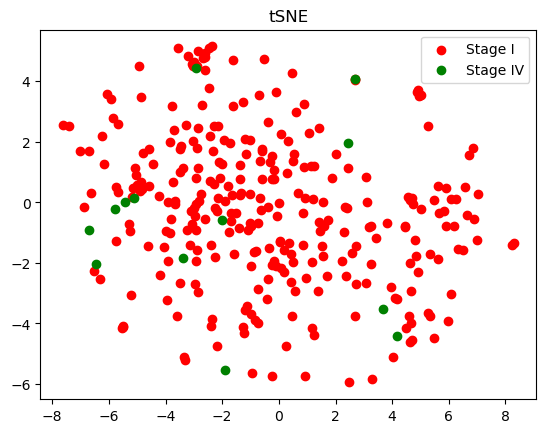

In [52]:
plt.figure()
for c, name in zip("rg", ["Stage I", "Stage IV"]):
    plt.scatter(points[meta_values == name, 0], points[meta_values == name, 1], c=c, label=name)
plt.title("tSNE")
plt.legend(loc='best', shadow=False)
plt.show()

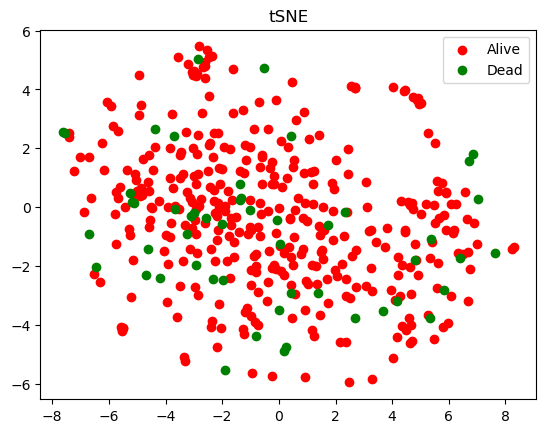

In [51]:
plt.figure()
for c, name in zip("rg", ["Alive", "Dead"]):
    plt.scatter(points[meta_values2 == name, 0], points[meta_values2 == name, 1], c=c, label=name)
plt.title("tSNE")
plt.legend(loc='best', shadow=False)
plt.show()

Da mesma maneira, através da técnica de t-SNE, não conseguimos explicar a variabilidade dos dados com base nas duas condições mencionadas acima.

### Clustering
O clustering é uma técnica de aprendizagem não supervisionada que identifica padrões e a estrutura nos dados, agrupando-os em conjuntos homogéneos. Utiliza medidas de distância ou similaridade para agrupar pontos de dados próximos, procurando maximizar a coesão intra-cluster e a separação inter-cluster. Esses grupos podem revelar insights sobre a estrutura subjacente dos dados.

No nosso relatório, foram abordados dois algoritmos de clustering: K-means, que é um algoritmo de clustering que divide um conjunto de dados em K clusters, minimizando a soma dos quadrados das distâncias entre os pontos e os centroides; e clustering hierárquico, que constrói uma árvore de clusters, onde cada nó representa um cluster.

#### Hierárquico

Este tipo de clustering baseia-se na probabilidade de pertencer a um grupo e segue uma abordagem aglomerativa (recorrendo à estratégia bottom-up), começando pelas folhas até à raiz da árvore. A análise do cluster hierárquico usa a distânca Euclidiana para calcular a proximidade entre os pontos num espaço multidimensional, considerando todas as dimensões.

In [88]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

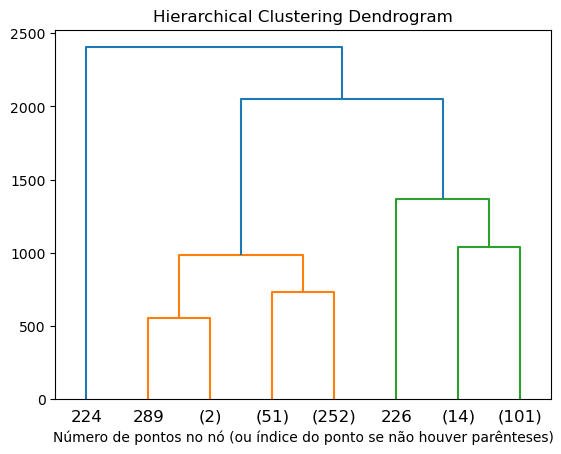

In [108]:
X = data_scale

# Inicialização do modelo de clustering hierárquico
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Ajuste do modelo aos seus dados
model.fit(X)

# Plotagem do dendrograma
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Número de pontos no nó (ou índice do ponto se não houver parênteses)")
plt.show()

#### K-Means

Esta abordagem de clustering, agrupa os dados de forma a minimizar as distâncias entre os pontos e centróides dos clusters. Um método muito utilizado para auxiliar na determinação do número adequado de clusters é o “método do cotovelo”. Este método envolve a análise da variação da soma dos quadrados intra-cluster (WSS) em relação ao número de clusters.

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

[22003756.80508828, 19327807.239011735, 18656048.13494756, 18717938.43754407, 18511743.78163115, 18247066.748595476, 17473943.739738263, 17153676.879025556, 16545319.650166787]


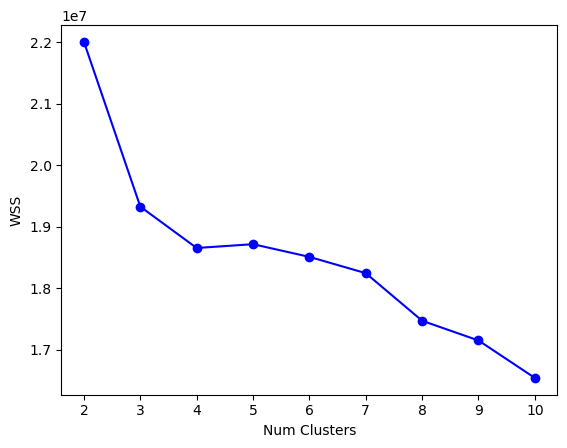

In [98]:
from sklearn.cluster import KMeans

ofs = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init = "auto")
    kmeans.fit(data_scale)
    ofs.append(kmeans.inertia_)

print(ofs)
plt.plot(range(2, 11), ofs, 'b-o')
plt.xlabel('Num Clusters')
plt.ylabel('WSS')
plt.show()


In [ ]:
#k=3

Através da observação do gráfico verificou-se que o ponto no gráfico que se assemelha a um “cotovelo” é o ponto K=3. A partir do ponto k=3, a adição de mais clusters não resulta numa redução significativa da WSS.
Partindo desse princípio, decidiu-se aplicar o algoritmo do K-means, de modo a criar uma tabela que permitisse analisar a distribuição das amostras nos clusters em relação ao metadado estudado (figo_stage).

In [99]:
kmeans3 = KMeans(n_clusters=3, n_init = "auto")
res_kmeans = kmeans3.fit(data_scale).predict(array_data)

pd.crosstab(amostras_filtradas.loc[:,"figo_stage"], res_kmeans)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


col_0,0,1,2
figo_stage,,,
Stage I,2,65,232
Stage II,0,15,20
Stage III,0,21,55
Stage IV,0,2,11


Observando a tabela, verificou-se que existem clusters que têm uma separação diferenciada dos dados no que toca ao metadado analisado (figo_stage), cumprindo o principal propósito do k-means.No entanto, existem clusters cuja separação dos dados não é a clara.